In [4]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("../")
from Plotting.generate_database import ResultsDatabaseGenerator
ex_path = "WINE_Hybrid_Noisy_Experiment3"

In [7]:
dbGen = ResultsDatabaseGenerator()
dbGen.initialize_from_folder(ex_path)
data = dbGen.data

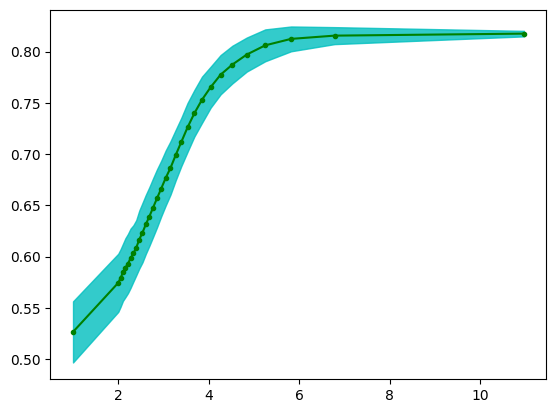

In [37]:
%matplotlib inline
x = []
y = []
y_err = []

for i in range(1, len(data)):
    config = data[i]['config']
    if(config['PWB'] == 1 and config['network_type']=='classical' and config['num_qumodes']==3):
        metrics = data[i]['metrics']
        acc = metrics['val_accuracy']
        y.append(np.mean(acc))
        y_err.append(np.std(acc))
        x.append(np.log2(2/config['sigma']))

x,y,y_err = zip(*sorted(list(zip(x,y,y_err))))
x = np.array(x)
y = np.array(y)
y_err = np.array(y_err)
plt.plot(x,y, 'g', marker='.')
plt.fill_between(x,y-y_err, y+y_err, color='c', alpha=0.8)
plt.show()